In [145]:
import numpy as np
import matplotlib.pyplot as plt

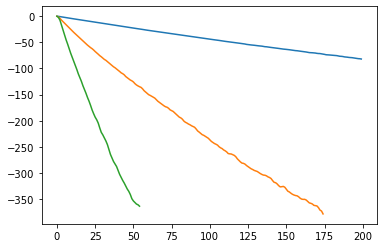

In [146]:
RT_EDC = np.load("data/RT-EDC-159.npy")
ISM_EDC = np.load("data/ISM-EDC-159.npy")

absorpt = [0.1, 0.5, 0.9]
plt.plot(RT_EDC)

In [147]:
print(RT_EDC.shape)
print(ISM_EDC.shape)

(200, 3)
(88201, 3)


In [172]:
def compute_rt60(energy, fs):
    kind = 20
    x0 = np.argmax(energy < -5)
    x1 = np.argmax(energy < -kind-5)
    
    t0 = x0 / (fs)
    t1 = x1 / (fs)
    
    x = np.arange(energy.shape[0])
    xp = np.linspace(t0, t1, x1 - x0)

    z = np.polyfit(xp, energy[x0:x1], 1)
    p = np.poly1d(z)
    
    return (-60 / z[0]), t0, p

In [173]:
axis = 2

rt60_ism, ism_delay, p_ism = compute_rt60(ISM_EDC[:,axis], 44100)
rt60_rt, rt_delay, p_rt = compute_rt60(RT_EDC[:,axis], 100)

RT60_ISM: 	96ms
RT60_RT: 	129ms


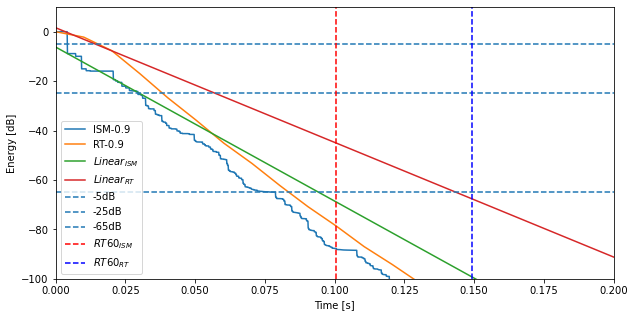

In [176]:
t0 = np.linspace(0, 2, ISM_EDC.shape[0])
t1 = np.linspace(0, 2, RT_EDC.shape[0])

plt.figure(figsize=(10, 5))

for x in [axis]:
    plt.plot(t0, ISM_EDC[:,x], label=f'ISM-{absorpt[x]}')

for x in [axis]:
    plt.plot(t1, RT_EDC[:,x], label=f'RT-{absorpt[x]}')
    
plt.plot(t0, p_ism(t0), label='$Linear_{ISM}$')    
plt.plot(t1, p_rt(t1), label='$Linear_{RT}$')   
    
plt.axhline(y=-5, linestyle='--', label='-5dB')
plt.axhline(y=-25, linestyle='--', label='-25dB')
plt.axhline(y=-65, linestyle='--', label='-65dB')
plt.axvline(x=rt60_ism + ism_delay , color='r', linestyle='--', label='$RT60_{ISM}$')
plt.axvline(x=rt60_rt + rt_delay, color='b', linestyle='--', label='$RT60_{RT}$')
plt.ylabel("Energy [dB]")
plt.xlabel("Time [s]")
plt.xlim(0, .2)
plt.ylim(-100, 10)
plt.legend()

plt.savefig("compare-absorption.png")
print(f"RT60_ISM: \t{rt60_ism * 1000:.0f}ms")
print(f"RT60_RT: \t{rt60_rt * 1000:.0f}ms")